In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# violations csv with website name and number of violations
df = pd.read_csv("./sign_up_violations.csv")
df['tranco_rank'] = ""
t_df = pd.read_csv("./tranco_W8P49.csv")

In [4]:
t_df['domain']

tranco_rank_dict = t_df.set_index('domain')['rank']
def get_tranco_rank(row):
    if row["Website"] in tranco_rank_dict:
        return tranco_rank_dict[row["Website"]]
    else:
        return None

df["tranco_rank"] = df.apply(get_tranco_rank, axis=1)
df.dropna(subset=['tranco_rank'])

,Website,Number of Violations,tranco_rank
1,100000jobs.ch,4,2338998.0
2,100hires.com,2,935835.0
3,100thieves.com,9,343876.0
5,111skin.com,7,409507.0
7,11bravos.com,6,1533377.0
...,...,...,...
10139,zuluandzephyr.com,5,941399.0
10140,zunior.com,11,2057587.0
10141,zuppler.com,3,184123.0
10142,zurchers.com,5,699795.0


In [5]:
# sort values
df.sort_values(by=['tranco_rank'])
df.to_csv('tranco_rank_of_signups.csv', encoding='utf-8')

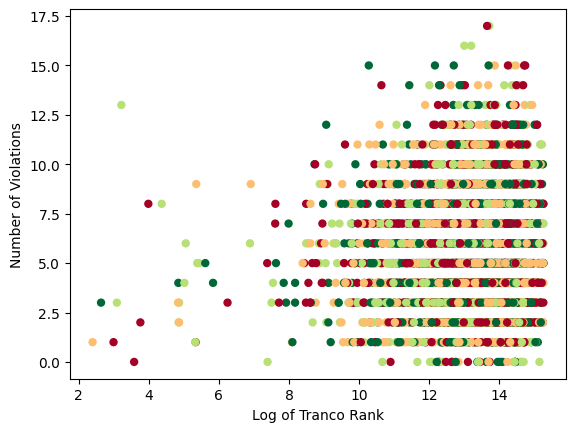

In [6]:

x = np.log(df["tranco_rank"])
y = df["Number of Violations"]
np.random.seed(42)
c = np.random.randint(1,5,size=len(x))
norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
sc = plt.scatter(x,y,c=c, s=25, cmap=cmap, norm=norm)
ax.set_ylabel("Number of Violations")
ax.set_xlabel("Log of Tranco Rank")
annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)


plt.savefig('tranco_rank.pdf', format="pdf", bbox_inches="tight")
plt.show()


In [6]:
sample_size = 30

# Calculate median of log
median_log_rank = np.nanmedian(np.log(df["tranco_rank"]))
left_data = df["tranco_rank"][df["tranco_rank"] <= np.exp(median_log_rank)]
right_data = df["tranco_rank"][df["tranco_rank"] > np.exp(median_log_rank)]

# Sample data and violations
left_sample = np.random.choice(left_data, size=sample_size, replace=False)
right_sample = np.random.choice(right_data, size=sample_size, replace=False)
sampled_data = np.concatenate((left_sample, right_sample))
sampled_violations = df.loc[df["tranco_rank"].isin(sampled_data), ["tranco_rank", "website", "violations"]]


print(sampled_violations)
sampled_violations.to_csv('sampled_violations.csv', encoding='utf-8')

       tranco_rank                  website  violations
214        35870.0               castos.com           1
534       300268.0                hiboy.com           3
908       372534.0  patagoniaprovisions.com           3
1248      851594.0     thmarinesupplies.com           4
1666       74548.0               adlice.com           5
2302     2575647.0      ashleylongshore.com           6
2392       16159.0            aufeminin.com           6
2479      984941.0               aylien.com           2
2741     2385365.0      bellahousewares.com           7
3119      572822.0        bondiboost.com.au           7
3260      148944.0              brumate.com           6
3317      197136.0               bunaai.com           8
3568      571879.0      cashgenerator.co.uk           6
3640     1284766.0  centrosdeadicciones.com           6
4017      763851.0        collect-world.com           5
4073     2087965.0           compubench.com           4
4183      491373.0               cosbar.com     